In [2]:
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [ ]:
n = 1000
m = 100


T = np.zeros(n)


for j in range(n):
    X=stats.expon.rvs(size=m)
    X=np.sort(X)
    S=np.mean(X)
    s=0
    for i in range(1,m+1):
      a=stats.expon(scale=S).cdf(max(0.00001, X[i-1]))
      b=1-stats.expon(scale=S).cdf(max(0.00001, X[m-i]))
      s+=((2*i-1)/m)*(np.log(a)+np.log(b))
    T[j]=-m-s

with open('Anderson-Darling.txt', 'w') as f:
  f.writelines(f"{item}\n" for item in T)

<ipython-input-31-ca9b834152da>:17: RuntimeWarning: divide by zero encountered in log
  s+=((2*i-1)/n)*(np.log(a)+np.log(b))


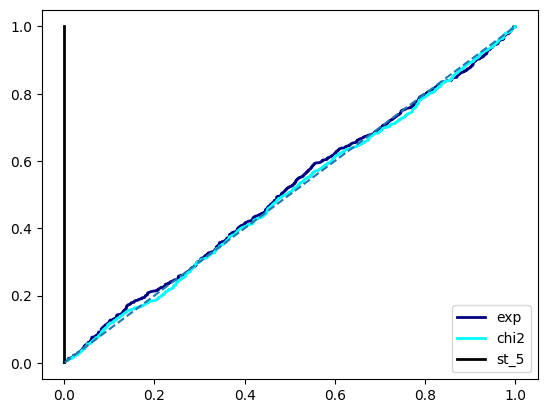

In [ ]:
## Задание 1


def MK(data, S):
  R=data>S
  size=len(data)
  pv=np.sum(R)/size
  return pv

def S(X, n):
    X=np.sort(X)
    S=np.mean(X)
    s=0
    for i in range(1,n+1):
      a=stats.expon(scale=S).cdf(max(0.00001, X[i-1]))
      b=1-stats.expon(scale=S).cdf(max(0.00001, X[n-i]))
      s+=((2*i-1)/n)*(np.log(a)+np.log(b))
    T=-n-s
    return T

file = open('Anderson-Darling.txt', 'r')
data_ad = file.read().splitlines()
file.close()

T = [eval(x) for x in data_ad]


n=1000
m=100

T[0:n]

res1=[]
res2=[]
res3=[]
a=np.random.uniform(1, 2)
for i in range(n):
  X=stats.expon(scale=a).rvs(size=m)
  Y=stats.gamma(a=1, scale=2).rvs(size=m)
  Z=stats.t(df=5).rvs(size=m)

  S1=S(X,m)
  pv1=MK(T,S1)
  res1=np.append(res1, pv1)

  S2=S(Y,m)
  pv2=MK(T,S2)
  res2=np.append(res2, pv2)

  S3=S(Z,m)
  pv3=MK(T,S3)
  res3=np.append(res3, pv3)

res1=np.sort(res1)
res2=np.sort(res2)
res3=np.sort(res3)


y_vals = [(i+1)/n for i in range(n)]
fig,ax = plt.subplots()
ax.plot(res1, y_vals, label = f"exp", lw = 2, color='navy')
ax.plot(res2, y_vals, label = f"chi2", lw = 2, color='aqua')
ax.plot(res3, y_vals, label = f"st_5", lw = 2, color='black')

plt.plot(y_vals,y_vals, linestyle='dashed')

plt.legend()


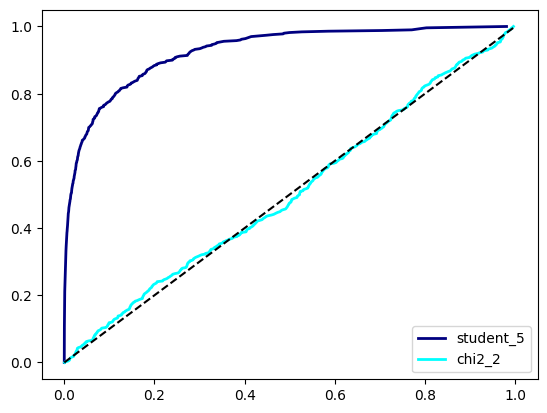

In [ ]:
## Задание 2
from scipy.optimize import minimize
def mle(data, sizes, corners):
    return minimize(L, x0=2, args=(data,sizes,corners), bounds=[(0, None)]).x[0]


def L(x, sample, sizes, corners):
    result = 0
    for j in range(df):
        if (j==0):
            result += sizes[j]*np.log(1e-4 + stats.expon(scale = x).cdf(corners[j]))
        elif (j==df-1):
            result += sizes[j]*np.log(1e-4 + 1 - stats.expon(scale = x).cdf(corners[j-1]))
        else:
            result += sizes[j]*np.log(1e-4 + stats.expon(scale = x).cdf(corners[j]) - stats.expon(scale = x).cdf(corners[j-1]))
    return -result


def pv(sample):
    z = np.array_split(np.sort(sample), df)
    sizes = [len(z[i]) for i in range(df)]
    corners = [z[i][len(z[i])-1] for i in range(df-1)]
    scale_mle = mle(sample, sizes, corners)
    probs = []
    for j in range(df):
        if (j==0):
            probs.append(stats.expon(scale = scale_mle).cdf(corners[j]))
        elif (j==df-1):
            probs.append(1 - stats.expon(scale = scale_mle).cdf(corners[j-1]))
        else:
            probs.append(stats.expon(scale = scale_mle).cdf(corners[j]) - stats.expon(scale = scale_mle).cdf(corners[j-1]))
    f_exp = n*np.array(probs)
    result = stats.chisquare(f_exp = f_exp, f_obs=sizes, ddof = 1).pvalue
    return result


n=500
m=500

df = math.floor(math.log2(m))
test_t = np.abs(stats.t.rvs(size=(n, m), df=5))
test_chi2 = stats.chi2.rvs(size=(n, m), df=2)

res_t = np.sort([pv(test_t[i]) for i in range(n)])
res_chi = np.sort([pv(test_chi2[i]) for i in range(n)])


fig, ax = plt.subplots()
y = np.linspace(0,1, n)

ax.plot(res_t, y, lw = 2, label = "student_5", color = 'navy')
ax.plot(res_chi, y, lw = 2, label = "chi2_2", color = 'aqua')
ax.plot(y,y, linestyle='dashed', c='black')
ax.legend()

In [ ]:
#Задание 3
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import normaltest

n=1000
m=100

res1=[]
res2=[]
c=1
for i in range(n):
  X=stats.weibull_min(c).rvs(size=m)
  Y=stats.binom(n=n, p=0.5).rvs(size=m)

  Z1=stats.gamma(a=5/2, scale=2).rvs(size=m)
  Z2=stats.gamma(a=5, scale=2).rvs(size=m)
  Z3=stats.gamma(a=25/2, scale=2).rvs(size=m)

  T, v, a=anderson(X)

  S1=S(X,m)
  pv1=MK(T,S1)
  res1=np.append(res1, pv1)
  S2=S(Y,m)
  pv2=MK(T,S2)
  res2=np.append(res2, pv2)

res1=np.sort(res1)
res2=np.sort(res2)


y_vals = [(i+1)/n for i in range(n)]
fig,ax = plt.subplots()
ax.plot(res1, y_vals, label = f"exp", lw = 2, color='navy')
ax.plot(res2, y_vals, label = f"chi2", lw = 2, color='aqua')

plt.plot(y_vals,y_vals, linestyle='dashed')

plt.legend()

In [6]:
file = open('ad_gof.txt', 'w')
num_samp = 10000
size_samp = 2000
data = stats.norm(loc=0, scale=1).rvs(size=(num_samp,size_samp))
for i in range(num_samp):
    print(stats.anderson((data[i]-data[i].mean())/data[i].std()).statistic, file = file)
file.close()

In [11]:
def MK(data, S):
  R=data>S
  size=len(data)
  pv=np.sum(R)/size
  return pv


file = open('ad_gof.txt', 'r')
data = file.read().splitlines()
file.close()
data = list(map(float, data))
division_rate = 100
ss = 50
alpha = 0.05
def task(distr, name, param):
    if distr == stats.weibull_min:
        test_param = np.linspace(0.1,20,50)
        example = distr(param)
    elif distr == stats.chi2:
        test_param = np.arange(1, 50, 1)
        example = distr(param)
    elif distr == stats.binom:
        distr = lambda x: stats.binom(x, p = 1/2)
        test_param = np.arange(5,250,5)
        example = distr(param)
    sample = example.rvs(size=(division_rate, ss))
    fig, ax = plt.subplots(1,2)
    plt.suptitle(name)
    stat1 = [stats.anderson((sample[i]-sample[i].mean())/sample[i].std()).statistic for i  in range(division_rate)]
    result1 = np.sort(list(map(lambda x: MK(data, x), stat1)))
    result2 = np.sort([stats.shapiro(sample[i]).pvalue for i  in range(division_rate)])
    result3 = np.sort([stats.normaltest(sample[i]).pvalue for i  in range(division_rate)])
    y = np.linspace(0,1, division_rate)
    ax[0].set_title("p-value ECDF")
    ax[0].plot(result1, y, lw = 2, label = "AD")
    ax[0].plot(result2, y, lw = 2, label = "SW")
    ax[0].plot(result3, y, lw = 2, label = "DA")
    ax[0].plot(y,y, linestyle='dashed', c='black')
    ax[0].legend()
    fig.tight_layout()
    power1 = []
    power2 = []
    power3 = []
    for param in test_param:
        sample = distr(param).rvs(size=(division_rate, ss))
        stat1 = [stats.anderson((sample[i]-sample[i].mean())/sample[i].std()).statistic for i  in range(division_rate)]
        result1 = np.sort(list(map(lambda x: MK(data, x), stat1)))
        result2 = np.sort([stats.shapiro(sample[i]).pvalue for i  in range(division_rate)])
        result3 = np.sort([stats.normaltest(sample[i]).pvalue for i  in range(division_rate)])

        check1= np.array(result1) < alpha
        power1.append(sum(check1)/division_rate)

        check2= np.array(result2) < alpha
        power2.append(sum(check2)/division_rate)

        check3= np.array(result3) < alpha
        power3.append(sum(check3)/division_rate)

    ax[1].set_title("Power")
    ax[1].plot(test_param, power1, lw = 2, label = "AD")
    ax[1].plot(test_param, power2, lw = 2, label = "SW")
    ax[1].plot(test_param, power3, lw = 2, label = "DA")
    ax[1].legend()

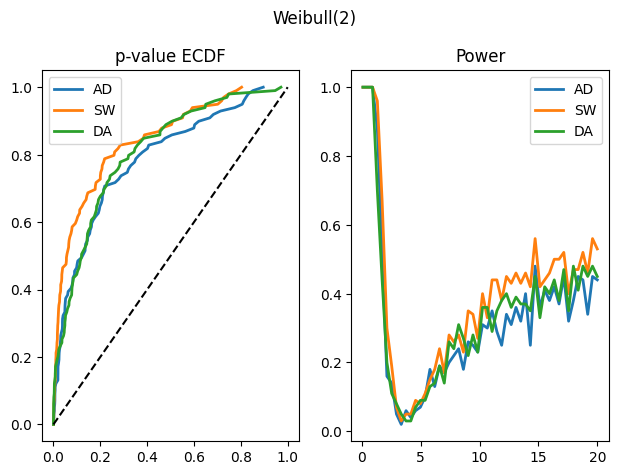

In [12]:
lambda_ = 2
name = f"Weibull({lambda_})"
task(stats.weibull_min, name, lambda_)

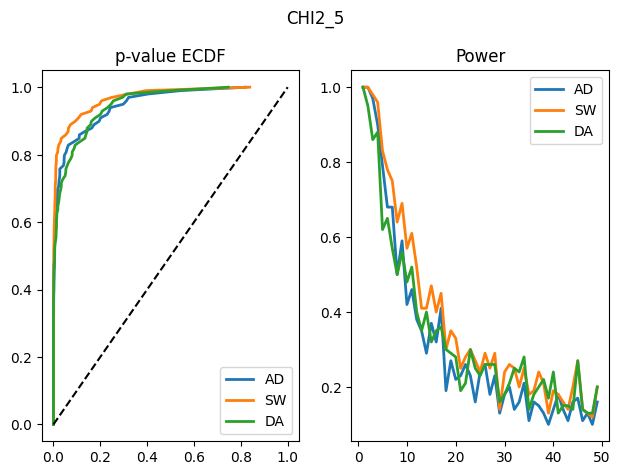

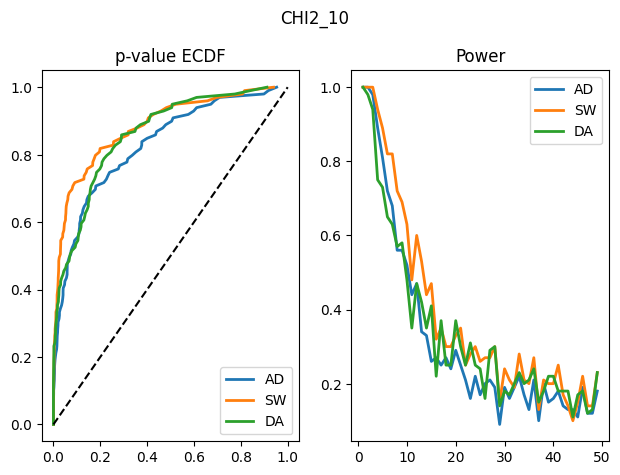

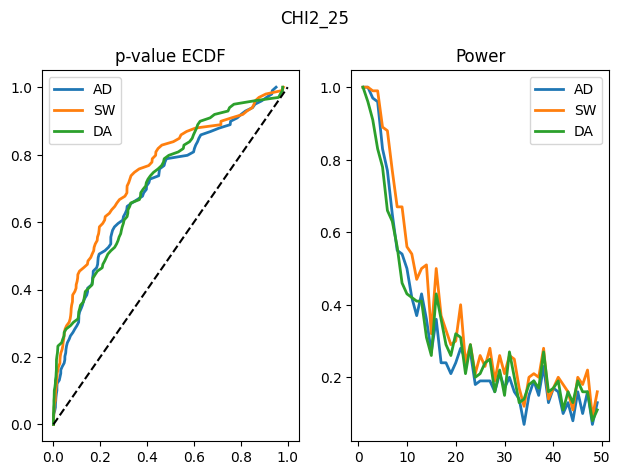

In [14]:
for df in [5,10,25]:
    name = f"CHI2_{df}"
    task(stats.chi2, name, df)

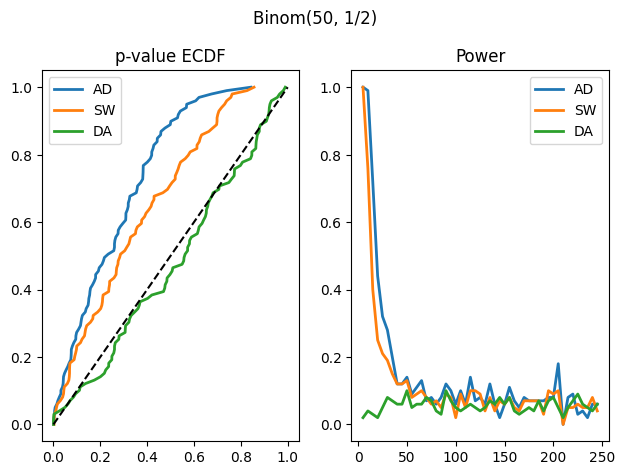

In [15]:
n_test = 50
name = f"Binom({n_test}, 1/2)"
task(stats.binom, name, n_test)